# 📘 Exploratory Data Analysis (EDA): Data Science Job Market
### 🔍 Investigating top-paying roles and high-demand skills in the data science industry

---

## 🎯 Project Goal
- Leverage Python to perform an in-depth exploratory analysis on a real-world dataset of job postings.
- Discover actionable insights for job-seekers, particularly those targeting **Data Analyst** roles in the **US** market.

---

## 📌 Final Deliverables
- 📒 Jupyter Notebooks covering:
  - Data cleaning
  - Exploratory analysis
  - Skill and salary insights
- 📄 `README.md` summarizing:
  - Key findings
  - Top roles and skills
  - Recommendations for job seekers
- 🔗 Public portfolio:
  - Hosted on GitHub
  - Shared on LinkedIn

---

## ❓ Core Questions to Explore
1. **Top Skills per Role**  
   What are the most in-demand skills for the top 3 most common job roles in data?

2. **Skill Trends for Data Analysts**  
   Are some tools or languages becoming more or less relevant over time?

3. **Salary vs Skills**  
   How do specific tools or skills correlate with higher salary bands for Data Analysts?

4. **Optimal Skill Strategy**  
   What is the single most optimal skill to learn for Data Analysts — considering both demand and salary?

---

## 👨‍💻 Scope
- Focused on US-based **Data Analyst** job roles.
- Dataset includes job titles, salaries, skills, locations, company details, and posted dates.

> _Note: This can be extended to other data roles like Data Scientist, ML Engineer, BI Developer in future iterations._

---

## ✅ Technologies Used
- Python (Pandas, NumPy)
- Visualization: Matplotlib, Seaborn
- Data Source: CSV job listing dataset (from Kaggle or similar)
- Jupyter Notebook
- GitHub for version control


### Roles to Explore:

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

#Loading Data
dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Filter the dataframe to include only Data Analyst roles located in the United States
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

In [4]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


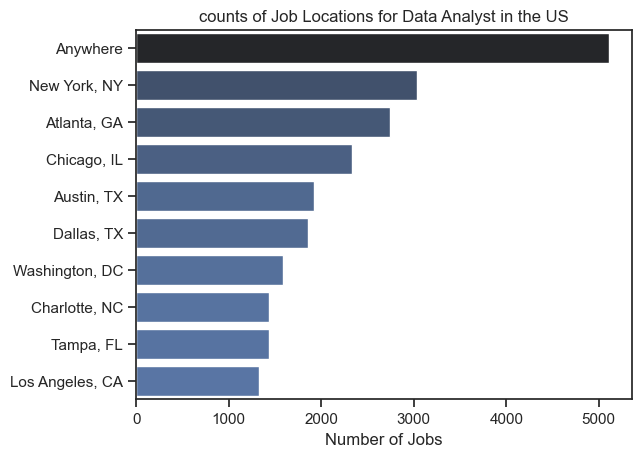

In [ ]:
# Get the top 10 most common job locations for Data Analyst roles in the US
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

# Set the seaborn theme for better aesthetics
sns.set_theme(style='ticks')

# Create a horizontal barplot of job counts by location
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r')

# Set plot title and axis labels
plt.title("Counts of Job Locations for Data Analyst in the US")
plt.xlabel('Number of Jobs')
plt.ylabel('')

# Remove the legend for clarity
plt.legend().remove()

# Display the plot
plt.show()

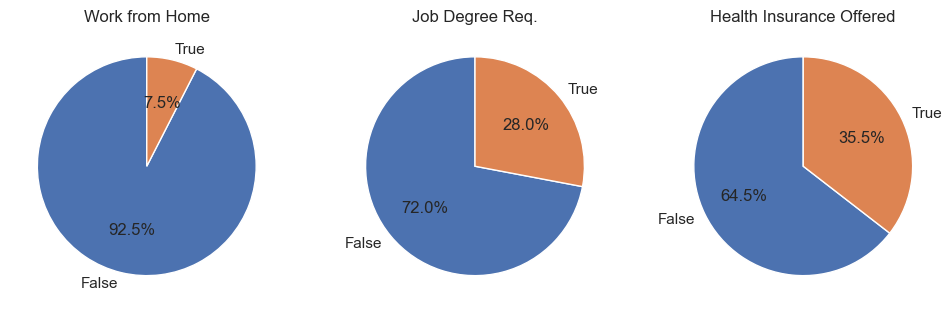

In [23]:
# Dictionary mapping column names to plot titles
dict_column={
    'job_work_from_home':'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance':'Health Insurance Offered'
}

# Create a figure with 1 row and 3 columns of subplots
fig, ax=plt.subplots(1,3)
fig.set_size_inches((12,5))

# Loop through each column and plot a pie chart for its value counts
for  i, (column, title) in enumerate(dict_column.items()):
    # Plot pie chart for True/False counts in the column
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90,autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)
    
plt.show()

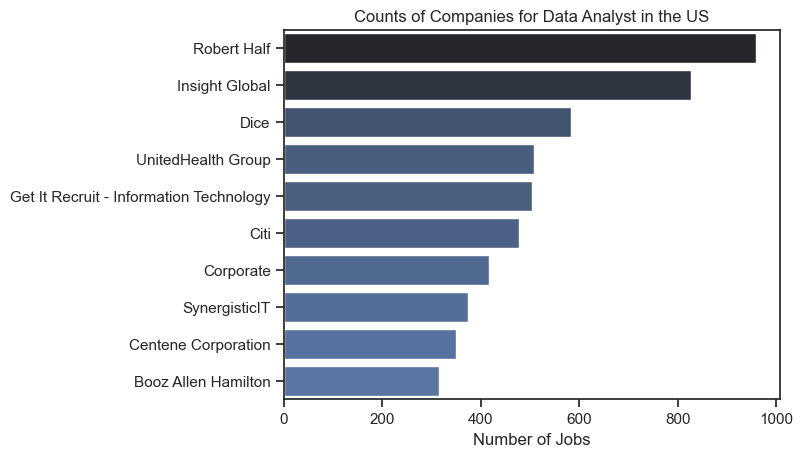

In [22]:
# Plot the top 10 companies with the most Data Analyst job postings in the US
df_plot=df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r')
plt.title("Counts of Companies for Data Analyst in the US")
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.legend().remove()
plt.show()